In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline

Hypothesis function for logistic regression takes form $ h(\theta) = \frac{1}{1 \ + \ e^{\ -\theta^T x}} $

With cost function defined as: $ Cost \ (h_\theta (x), \ y) = - \ y \ log(h_\theta (x)) \ - \ (1 - y) \ log(1 - h_\theta (x)) $

In [129]:
class LogReg(object):
    
    def __init__(self, iterations=1000, learning_rate=0.01):
        self.iterations = iterations
        self.learning_rate = learning_rate
        self.x = None
        self.y = None
        self.w = None
        self.costs = []
        
    def sigmoid(self, data=None):
        if data is None:
            data = self.x
        return 1 / (1 + np.e ** (-self.w.T @ data))
        
    def cost(self):
        return - self.y.T @ np.log(self.sigmoid()).T - (1 - self.y).T @ np.log(1 - self.sigmoid()).T
        
    def fit(self, x, y):
        self.x = x
        self.y = y
        if self.w is None:
            self.w = np.ones((self.x.shape[0], 1))
        for _ in range(self.iterations):
            updated_w = np.ones_like(self.w)
            for i, param in enumerate(self.w):
                updated_w[i] = param - self.learning_rate * 1/self.x.shape[1] * (self.sigmoid().T - self.y).T @ self.x[i, :].T
            self.w = updated_w
            if _ % (self.iterations / 100) == 0:
                self.costs.append(np.sum(self.cost()))
                
    def plot_costs(self):
        plt.plot(self.costs)
        
    def score(self, x_data, y_data):
        predictions = (1 / (1 + np.e ** (-self.w.T @ x_data)).T > 0.5).astype("int") == y_data
        return np.sum(predictions) / len(predictions)

Since above implementation of Logistic Regression algorithm is quite limited, it is necessary to heavily adjust the input data.

In [120]:
titanic = sns.load_dataset("titanic")
titanic.drop(["sex", "embarked", "class", "who", "deck", "embark_town", "alive"], axis=1, inplace=True)
titanic.dropna(inplace=True)
y = titanic["survived"]
x = titanic.drop("survived", axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [122]:
xm = X_train.values.T.astype('float')
xm = np.insert(xm, 0, 1, axis=0)
ym = y_train.values.reshape(len(y_train), 1)

In [130]:
mod = LogReg(iterations=10000, learning_rate=0.003)

In [131]:
mod.fit(xm, ym)

C:\Users\Albert\Anaconda3\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: divide by zero encountered in log


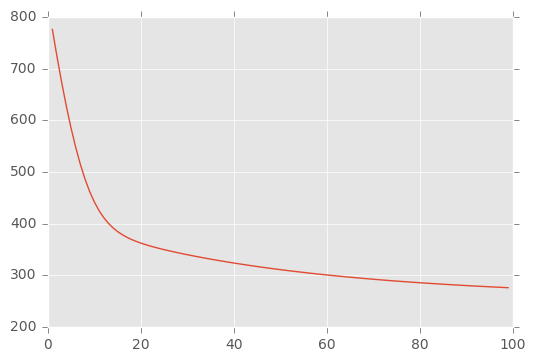

In [132]:
mod.plot_costs()

In [134]:
x_t = X_test.values.astype("float")
x_t = np.insert(x_t, 0, 1, axis=1).T
y_t = y_test.values.reshape(len(y_test), 1)
mod.score(x_t, y_t)

0.80419580419580416

Let's compare that score with the score achieved (on the same data) by Logistic Regression model implemented in Scikit-learn, to see if it works acceptably well.

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
modsk = LogisticRegression()

In [73]:
modsk.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [75]:
modsk.score(X_test, y_test)

0.81818181818181823

Close enough ;)